- Airline: The name of the airline.
- Date_of_Journey: The date of the journey
- Source: The source from which the service begins.
- Destination: The destination where the service ends.
- Route: The route taken by the flight to reach the destination.
- Dep_Time: The time when the journey starts from the source.
- Arrival_Time: Time of arrival at the destination.
- Duration: Total duration of the flight.
- Total_Stops: Total stops between the source and destination.
- Additional_Info: Additional information about the flight
- Price: The price of the ticket

## Loading the Imports

In [1]:
# Basic imports
import pandas as pd
import numpy as np

# Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Listing all the files
! cd data && ls

Data_Train.xlsx        Sample_submission.xlsx Test_set.xlsx


In [3]:
# Loading the train test data
train = pd.read_excel("./data/Data_Train.xlsx")
test = pd.read_excel("./data/Test_set.xlsx")

In [4]:
print(train.shape, test.shape)

(10683, 11) (2671, 10)


In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# More info on the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Pre-Processing

In [7]:
# Get all the null rows in the file
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Since the number of null rows are minimum, we can drop them
train.dropna(inplace=True)

In [9]:
# To check if there are any duplicated values
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


Since the data has duplicated values, we are going to drop them.

In [10]:
# To remove all the duplicate values
train.drop_duplicates(keep="first", inplace=True)

In [11]:
# To find unique values of entire training data to understand anomalies
for i in train.columns:
    print("Column: " + i)
    print(train[i].value_counts())
    print("-----------")

Column: Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------
Column: Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
1/06/2019     330
24/06/2019    330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/

In [12]:
train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

No info equals No Info. Converting them to the same

In [13]:
train["Additional_Info"] = train["Additional_Info"].replace({'No Info': 'No info'})

In [14]:
train['Duration'] = train['Duration'].str.replace("h", '*60').str.replace("m", "*1").str.replace(" ", "+").apply(eval)

In [15]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [16]:
# Alter date time information from train data

# Date_of_Journey
train["Journey_day"] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train["Journey_month"] = train['Date_of_Journey'].str.split('/').str[1].astype(int)
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Departure time information
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
train.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25


In [18]:
# Alter date time information from train data

# Date_of_Journey
test["Journey_day"] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test["Journey_month"] = test['Date_of_Journey'].str.split('/').str[1].astype(int)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
# Total_Stops
train['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [20]:
# Making a copy for EDA
df1 = train.copy()

## EDA on Training Set

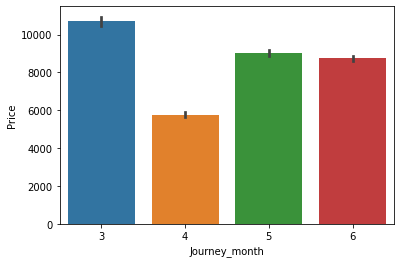

In [21]:
# Prices on the following months
plt = sns.barplot(x="Journey_month", y="Price", data=df1)

In [22]:
#count of flights per month
top_month=df1.Journey_month.value_counts().head(20)
top_month

5    3395
6    3311
3    2678
4    1078
Name: Journey_month, dtype: int64

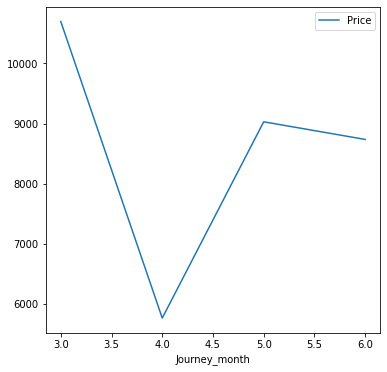

In [23]:
monthly_avg = df1.groupby(['Journey_month']).agg({'Price':np.mean}).reset_index()
monthly_avg.plot(x="Journey_month", y="Price", figsize=(6, 6))

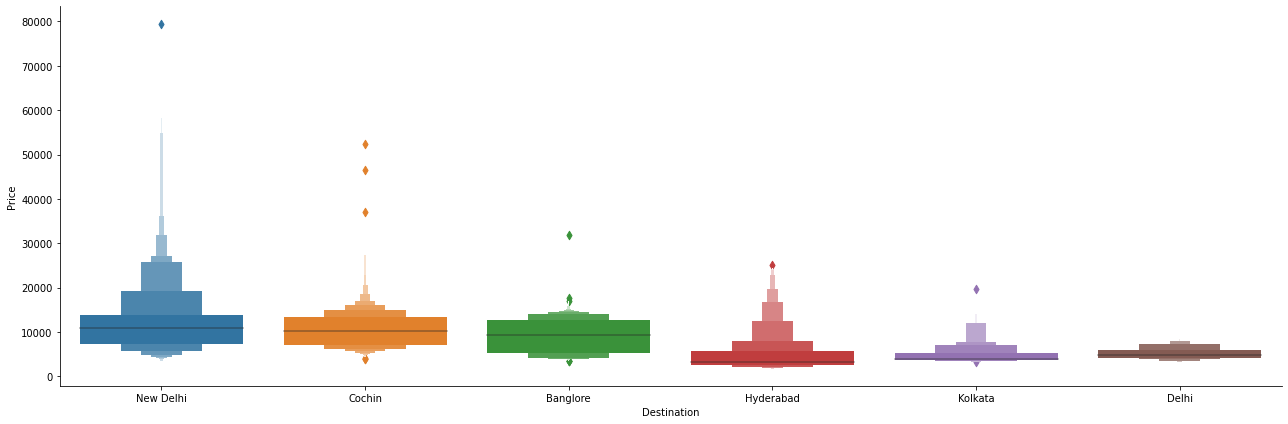

In [24]:
# Destination vs AveragePrice
sns.catplot(y='Price', x='Destination', data= df1.sort_values('Price',ascending=False), kind="boxen", height=6, aspect=3)

The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)

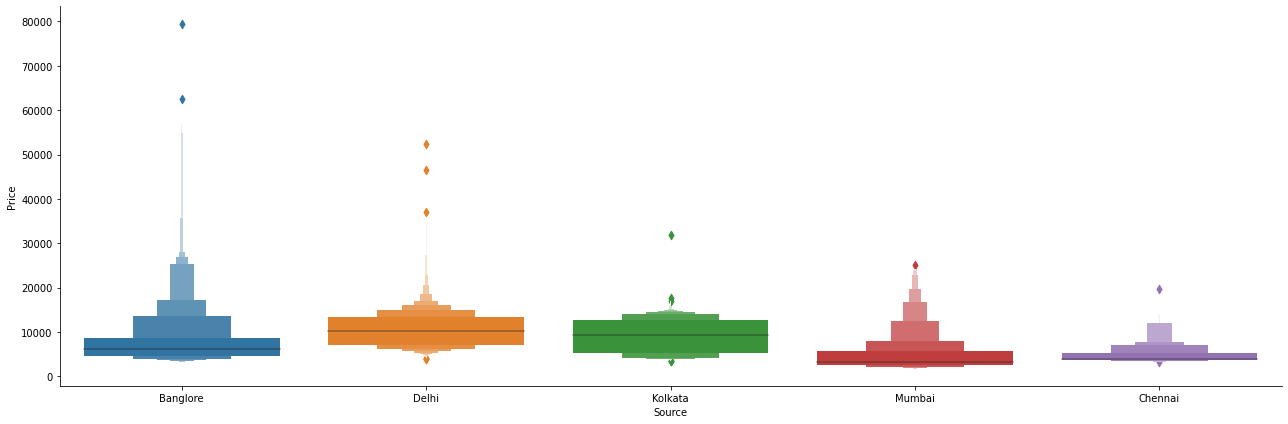

In [25]:
# Source vs AveragePrice
sns.catplot(y='Price',x='Source',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)

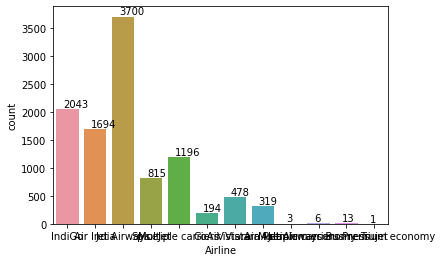

In [26]:
# Number of flights vs Airlines
ax = sns.countplot(x = 'Airline', data =train)
# plt.figure(figsize = (10, 10))
# plt.title('Count of flights with different Airlines')
# plt.xlabel('Airline')
# plt.ylabel('Count of flights')
# plt.xticks(rotation = 90)

# To get individual heights of the bar-plot
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

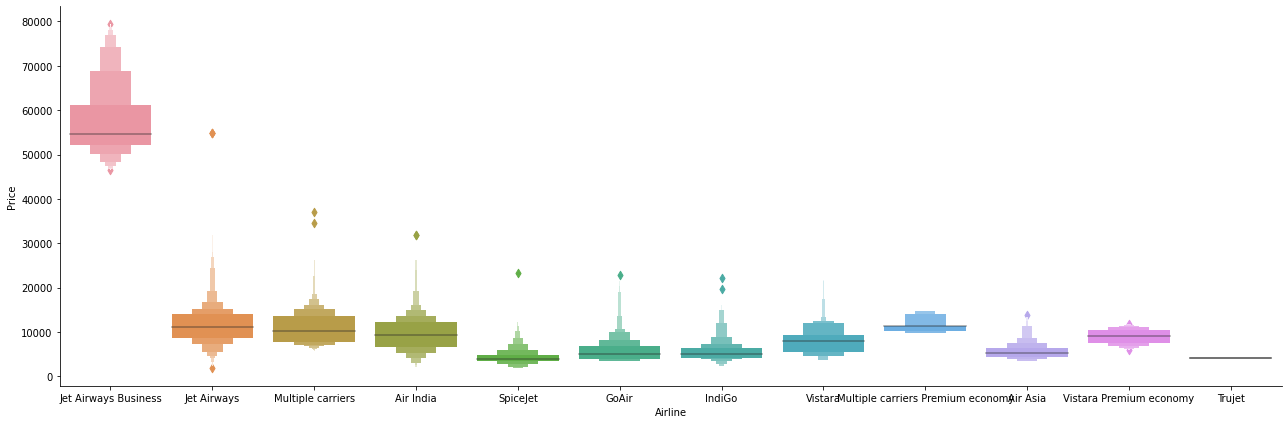

In [27]:
sns.catplot(y='Price', x='Airline', data= train.sort_values('Price',ascending=False), kind="boxen", height=6, aspect=3)
# plt.show

Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

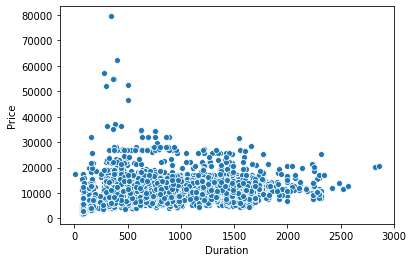

In [28]:
sns.scatterplot(x="Duration", y="Price", data=train)

We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)


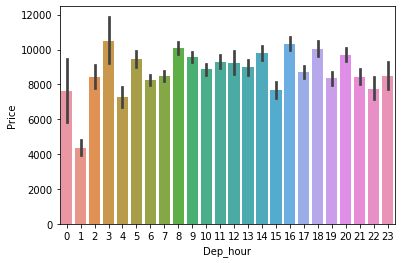

In [29]:
# Dept time vs average price
sns.barplot(x="Dep_hour", y="Price", data=train)

In [30]:
# Number of flights leaving at each hour of the day
train.Dep_hour.value_counts().sort_index()

0      40
1      37
2     194
3      24
4     169
5     582
6     675
7     863
8     694
9     886
10    527
11    579
12    178
13    411
14    505
15    319
16    461
17    689
18    441
19    544
20    649
21    489
22    373
23    133
Name: Dep_hour, dtype: int64

Early Morning flights are always cheaper and so are midnight flight prices.
Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

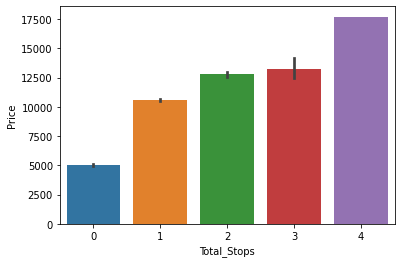

In [31]:
plot = sns.barplot(x="Total_Stops", y="Price", data=train)

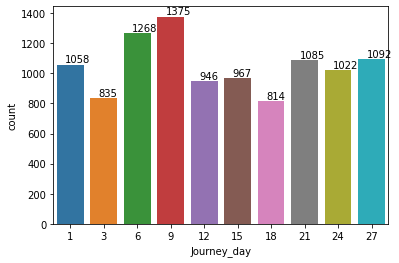

In [32]:
#Count of flights with different dates
# plt.figure(figsize = (8, 8))
# plt.title('Count of flights with different dates')
ax = sns.countplot(x = 'Journey_day', data =train)
# plt.xlabel('Journey_Day')
# plt.ylabel('Count of flights')
# plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

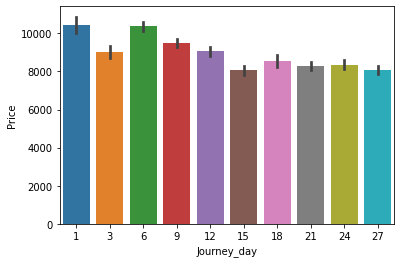

In [33]:
# Average price per departure day
ax = sns.barplot(x="Journey_day", y="Price", data=train)

### Outlier detection

In [34]:
ncol=["Duration"]          
for i in ncol:
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    train = train.drop(train[train.loc[:,i] <= min].index)
    train = train.drop(train[train.loc[:,i] >= max].index)

In [35]:
train.shape

(10387, 14)

### Correlation Test

Pearson correlation coefficient : To check the linear association between the target variable and independent continuous variable.(this condition needs to be met)

**H0**: Two variables are not correlated

**H1**: Two variables are correlated

if p-value < 0.05, then we reject the null hypothesis and accept the H1, saying they are correlated.

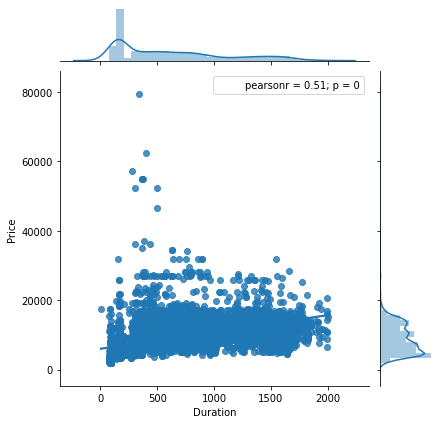

In [52]:
import scipy.stats as stats
_ = sns.jointplot(x="Duration", y="Price", data=train, kind='reg');
_.annotate(stats.pearsonr);

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.

## Fetaure Encoding

In [44]:
# Handling Numerical and Categorical varibles
data = train.drop(["Price"], axis=1)

In [45]:
# Exrtracting all the numerical and categorical in a seperated df
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test.select_dtypes(include=['int64', 'float','int32'])

In [46]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [47]:
# Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [48]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,7
1,1,3,0,83,7
2,4,2,1,117,7
3,3,3,0,90,7
4,3,0,5,29,7


In [49]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = train['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

## Building ML models

In [53]:
# ML Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print("Shape of all the data\nX_train: %s\nX_test: %s\ny_train: %s\ny_test: %s" %(str(X_train.shape), str(X_test.shape), str(y_train.shape), str(y_test.shape)))

Shape of all the data
X_train: (7270, 13)
X_test: (3117, 13)
y_train: (7270,)
y_test: (3117,)


In [66]:
def model_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print("Metrics for training data")
    print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
    print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
    print("R-squared: ", r2_score(y_train.values, y_train_pred))
    print("\nMetrics for test data")
    print("Root mean squared error: ", sqrt(mse(y_test.values, y_test_pred)))
    print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test.values, y_test_pred)))
    print("R-squared: ", r2_score(y_test.values, y_test_pred))

### Lasso Regressor

In [67]:
# Lasso Regressor

# Training the model
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params, cv=15, scoring='neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

# Predicting the scores
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

# Getting the model score
model_metrics(y_train, y_train_pred, y_test, y_test_pred)

Metrics for training data
Root mean squared error:  3585.620537856936
Mean absolute % error:  32
R-squared:  0.42554909435642574

Metrics for test data
Root mean squared error:  3171.1330347304233
Mean absolute % error:  33
R-squared:  0.4686567462144139


### Ridge Regressor

In [68]:
params = {'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

y_train_pred =ridge_regressor.predict(X_train)
y_test_pred =ridge_regressor.predict(X_test)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

Metrics for training data
Root mean squared error:  3574.6038282904838
Mean absolute % error:  32
R-squared:  0.42907363721821146

Metrics for test data
Root mean squared error:  3170.4852741478003
Mean absolute % error:  33
R-squared:  0.4688737967506671


In [78]:
ridge_regressor.best_params_

{'alpha': 10}

### K Neighbors Regressor

In [71]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

Metrics for training data
Root mean squared error:  2568.7026853817097
Mean absolute % error:  15
R-squared:  0.7051833924940167

Metrics for test data
Root mean squared error:  2761.6698075189856
Mean absolute % error:  20
R-squared:  0.5970141926106909


In [76]:
# Best params
knn_regressor.best_params_

{'n_neighbors': 5}

### Decision Tree Regressor

In [84]:
depth = list(range(0,30))
param_grid = dict(max_depth=depth)
tree = GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

Metrics for training data
Root mean squared error:  316.3034578627401
Mean absolute % error:  1
R-squared:  0.9955297465779563

Metrics for test data
Root mean squared error:  1750.4173453623976
Mean absolute % error:  9
R-squared:  0.8381064808317195


In [85]:
tree.best_params_

{'max_depth': 19}

### Random Forest Regressor

In [93]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = GridSearchCV(RandomForestRegressor(), tuned_params, verbose=2, cv=10)
random_regressor.fit(X_train, y_train)

y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

Metrics for training data

- Root mean squared error:  695.2297226927843
- Mean absolute % error:  3
- R-squared:  0.9784036216763377

Metrics for test data

- Root mean squared error:  1254.143507715102
- Mean absolute % error:  8
- R-squared:  0.9168924047868204


In [91]:
random_regressor.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

### XGBoost Regressor

In [96]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train Results for XGBoost Regressor Model:

- Root mean squared error:  1180.5395987324898
- Mean absolute % error:  9.0
- R-squared:  0.9356271400960482
    
Test Results for XGBoost Regressor Model:

- Root mean squared error:  1567.100172837462
- Mean absolute % error:  11.0
- R-squared:  0.8817539869409088

**Random Forest Regressor** & **XGB Regressor** are giving Maximum Accuracy as compare to other Regressor algorithm.